# Insurance Data
* James Belk
* 04/05/2023

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

## Load and Filter Data

In [2]:
file = 'Data/insurance.csv'
df = pd.read_csv(file)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# Drop null values from related columns
df = df.dropna(subset = ['sex', 'smoker', 'region', 'charges'])

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Q1 - Do smokers have higher insurance charges than non-smokers?

### State the Hypothesis & Null Hypothesis
- $H_0$ (Null Hypothesis): There is no difference in insurance charges between smokers and non-smokers.
- $H_A$ (Alternative Hypothesis): There is a difference in insurance charges between smokers and non-smokers.

### Determine the correct test to perform.
* Numerical
* Two groups/samples
*We want to run a 2-sample T-Test.

### Visualize and seperate data for hypothesis

In [4]:
print(df['smoker'].describe())
df['smoker'].value_counts()

count     1338
unique       2
top         no
freq      1064
Name: smoker, dtype: object


no     1064
yes     274
Name: smoker, dtype: int64

In [5]:
df['charges'].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

In [6]:
# create a column that easily seperates the groups
df['is_smoker'] = df['smoker'].str.contains('yes')
df['is_smoker'].value_counts()

False    1064
True      274
Name: is_smoker, dtype: int64

In [7]:
needed_cols = ['is_smoker', 'charges']
df[needed_cols]

,is_smoker,charges
0,True,16884.92400
1,False,1725.55230
2,False,4449.46200
3,False,21984.47061
4,False,3866.85520
...,...,...
1333,False,10600.54830
1334,False,2205.98080
1335,False,1629.83350
1336,False,2007.94500


In [8]:
not_smoker_df = df.loc[df['is_smoker']==False, needed_cols]
not_smoker_df

,is_smoker,charges
1,False,1725.55230
2,False,4449.46200
3,False,21984.47061
4,False,3866.85520
5,False,3756.62160
...,...,...
1332,False,11411.68500
1333,False,10600.54830
1334,False,2205.98080
1335,False,1629.83350


In [9]:
smoker_df = df.loc[df['is_smoker']==True, needed_cols]
smoker_df

,is_smoker,charges
0,True,16884.92400
11,True,27808.72510
14,True,39611.75770
19,True,36837.46700
23,True,37701.87680
...,...,...
1313,True,36397.57600
1314,True,18765.87545
1321,True,28101.33305
1323,True,43896.37630


In [10]:
plot_df = pd.concat([not_smoker_df, smoker_df])
plot_df

,is_smoker,charges
1,False,1725.55230
2,False,4449.46200
3,False,21984.47061
4,False,3866.85520
5,False,3756.62160
...,...,...
1313,True,36397.57600
1314,True,18765.87545
1321,True,28101.33305
1323,True,43896.37630


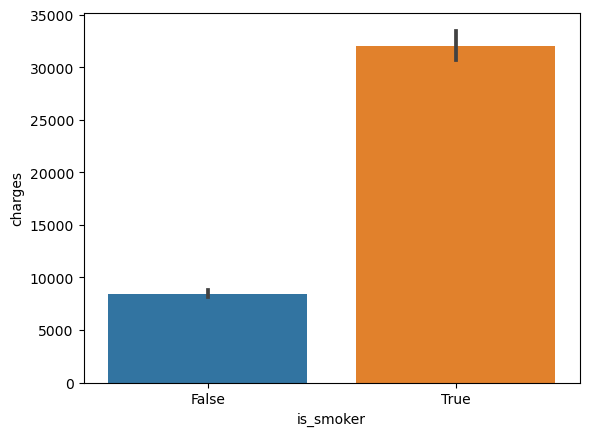

In [11]:
sns.barplot(data=plot_df, x='is_smoker', y='charges');

### Testing Assumptions

#### Check for Outliers

In [12]:
smoker_group = smoker_df['charges']
not_smoker_group = not_smoker_df['charges']
not_smoker_group

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

In [13]:
smoker_outliers = np.abs(stats.zscore(smoker_group)) > 3
smoker_outliers.sum()

0

In [14]:
not_smoker_outliers = np.abs(stats.zscore(not_smoker_group)) > 3
not_smoker_outliers.sum()

24

In [15]:
not_smnoker_group = not_smoker_group.loc[~not_smoker_outliers]

#### Test for Normality

In [16]:
result = stats.normaltest(smoker_group)
result.pvalue

5.564930630036463e-14

In [17]:
len(smoker_group)

274

In [18]:
result = stats.normaltest(not_smoker_group)
result.pvalue

1.9193129759002216e-69

In [19]:
len(not_smoker_group)

1064

* Do to the vast difference in p-value we can assume normalcy.

#### Test for Equal Variances

In [20]:
result = stats.levene(smoker_group, not_smoker_group)
result

LeveneResult(statistic=332.6135162726081, pvalue=1.5593284881803726e-66)

In [21]:
if result.pvalue < .05:
    print(f"The groups do NOT have equal variance.")
else:
    print(f"The groups DO have equal variance.")

The groups do NOT have equal variance.


- We met the assumption for our normality but did not meet the assumption of equal variance. Therefore, we will run a Welch's T-Test instead.

### Hypothesis Test

In [22]:
result = stats.ttest_ind(smoker_group, not_smoker_group, equal_var = False)
print(result)
result.pvalue < 0.05

Ttest_indResult(statistic=32.751887766341824, pvalue=5.88946444671698e-103)


True

In [23]:
smoker_group.mean()

32050.23183153284

In [24]:
not_smoker_group.mean()

8434.268297856204

We had a p-value less than .05 for our Welch's Test. We reject the null hypothesis and support the alternative hypothesis that smokers have a higher insurance charge than non-smokers.

# Q2 - Are men more likely to smoke than women?

In [25]:
df.head()

,age,sex,bmi,children,smoker,region,charges,is_smoker
0,19,female,27.900,0,yes,southwest,16884.92400,True
1,18,male,33.770,1,no,southeast,1725.55230,False
2,28,male,33.000,3,no,southeast,4449.46200,False
3,33,male,22.705,0,no,northwest,21984.47061,False
4,32,male,28.880,0,no,northwest,3866.85520,False


### State the Hypothesis & Null Hypothesis
- $H_0$ (Null Hypothesis): There is no significant difference between the male population than the female population.
- $H_A$ (Alternate Hypothesis): There is a significant difference between the smoking male population than the female population.

### Determine the Correct Test to Perform
- Categorical Data
- Two groups/samples
- We want to run Chi-Squared Test.

In [26]:
print(df['sex'].describe())
df['sex'].value_counts()

count     1338
unique       2
top       male
freq       676
Name: sex, dtype: object


male      676
female    662
Name: sex, dtype: int64

In [29]:
df['is_female'] = df['sex'].str.contains('female')
df['is_female'].value_counts()

False    676
True     662
Name: is_female, dtype: int64

In [30]:
needed_cols = ['is_female', 'is_smoker']
df[needed_cols]

,is_female,is_smoker
0,True,True
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
1333,False,False
1334,True,False
1335,True,False
1336,True,False


In [31]:
male_df = df.loc[df['is_female']==False, needed_cols]
male_df

,is_female,is_smoker
1,False,False
2,False,False
3,False,False
4,False,False
8,False,False
...,...,...
1324,False,False
1325,False,False
1327,False,False
1329,False,False


In [32]:
female_df = df.loc[df['is_female']==True, needed_cols]
female_df

,is_female,is_smoker
0,True,True
5,True,False
6,True,False
7,True,False
9,True,False
...,...,...
1332,True,False
1334,True,False
1335,True,False
1336,True,False


In [33]:
plot_df = pd.concat([female_df, male_df])
plot_df

,is_female,is_smoker
0,True,True
5,True,False
6,True,False
7,True,False
9,True,False
...,...,...
1324,False,False
1325,False,False
1327,False,False
1329,False,False


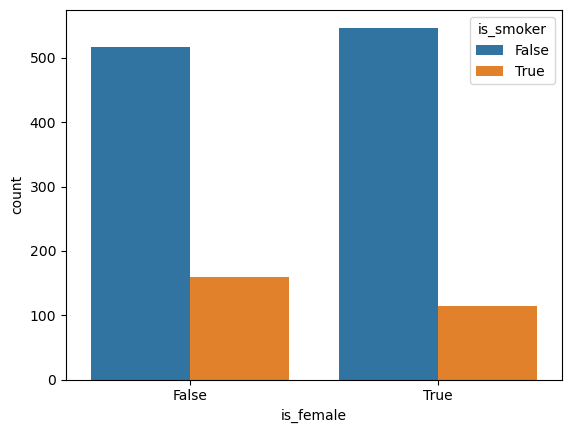

In [47]:
sns.countplot(data=plot_df, x='is_female', hue = 'is_smoker');

### Testing Assumptions

#### Checking Assumption for No Sig. Outliers

In [36]:
male_group = male_df['is_smoker']
female_group = female_df['is_smoker']
male_group

1       False
2       False
3       False
4       False
8       False
        ...  
1324    False
1325    False
1327    False
1329    False
1333    False
Name: is_smoker, Length: 676, dtype: bool

In [37]:
female_outliers = np.abs(stats.zscore(female_group)) > 3
female_outliers.sum()

0

In [39]:
male_outliers = np.abs(stats.zscore(male_group)) > 3
male_outliers.sum()

0

#### Test for Normality

In [40]:
result = stats.normaltest(female_group)
result.pvalue

1.5451615879700298e-40

In [41]:
len(female_group)

662

In [42]:
result = stats.normaltest(male_group)
result.pvalue

2.9790348129116147e-27

In [43]:
len(male_group)

676

#### Test for Equal Variances

In [48]:
result = stats.levene(male_group, female_group)
print(result)

LeveneResult(statistic=7.799582538314033, pvalue=0.005300369127378653)


In [49]:
if result.pvalue < .05:
    print(f"The groups do NOT have equal variance.")
else:
    print(f"The groups DO have equal variance.")

The groups do NOT have equal variance.


- We met normalcy but failed to meet the assumption of equal variance. Therefore, we will run a Chi-Squared Test.

#### Chi-Squared Test

In [50]:
table = pd.crosstab(df['sex'], df['is_smoker'])
table

is_smoker,False,True
sex,,
female,547,115
male,517,159


In [51]:
result = stats.chi2_contingency(table)
chi2, p, deg_free, expected_vals = result

In [52]:
print(p)
p<.05

0.006548143503580696


True

- We had a p-value < .05 for our chi-squared test. We reject the null hypothesis and support the alternative that there is a significant difference between the smoking male population than the female population.

# Q3 - Do different regions have different charges, on average?

## State the Hypothesis & Null Hypothesis
- $H_0$ (Null Hypothesis): There is no significant difference in charges by region.
- $H_A$ (Alternate Hypothesis): There is a significant difference in charges by region.

### Determine the Correct Test to Perform
- Numerical Data
- More than two groups/samples
- We want to run an ANOVA test.

In [55]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

### Visualize and Separate Data for Hypothesis

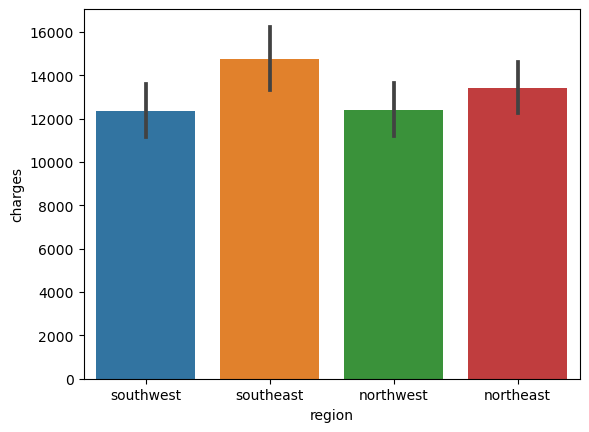

In [59]:
sns.barplot(data=df, x='region', y='charges');

In [60]:
needed_cols = ['region', 'charges']
df[needed_cols]

,region,charges
0,southwest,16884.92400
1,southeast,1725.55230
2,southeast,4449.46200
3,northwest,21984.47061
4,northwest,3866.85520
...,...,...
1333,northwest,10600.54830
1334,northeast,2205.98080
1335,southeast,1629.83350
1336,southwest,2007.94500


In [62]:
groups = {}

for region in df['region'].unique():
    temp = df.loc[df['region']==region, 'charges']
    groups[region] = temp
    
groups.keys()

dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

In [63]:
groups['southeast']

1        1725.5523
2        4449.4620
5        3756.6216
6        8240.5896
11      27808.7251
           ...    
1322    12981.3457
1323    43896.3763
1327     9377.9047
1330    12629.1656
1335     1629.8335
Name: charges, Length: 364, dtype: float64

### Testing Assumptions
- No significant outliers
- Normality
- Equal Variance

#### Checking Assumption of No Significant Outliers

In [64]:
for region, data in groups.items():
    outliers = np.abs(stats.zscore(data)) > 3
    
    print(f'There were {outliers.sum()} outliers in the {region} group.')
    
    data = data.loc[~outliers]
    groups[region] = data

There were 8 outliers in the southwest group.
There were 2 outliers in the southeast group.
There were 7 outliers in the northwest group.
There were 4 outliers in the northeast group.


#### Test for Normality

In [65]:
norm_results = [['group', 'n', 'pval', 'sig?']]

for region, data in groups.items():
    stat, p = stats.normaltest(data)
    norm_results.append([region, len(data),p, p<.05])

normal_results = pd.DataFrame(norm_results[1:], columns = norm_results[0])
normal_results

,group,n,pval,sig?
0,southwest,317,7.728611e-22,True
1,southeast,362,1.936990e-13,True
2,northwest,318,2.940543e-19,True
3,northeast,320,3.557877e-17,True


#### Test for Equal Variances

In [66]:
result = stats.levene(*groups.values())
print(result)

LeveneResult(statistic=9.518349004554441, pvalue=3.2035503711783993e-06)


In [67]:
if result.pvalue < .05:
    print(f"The groups do NOT have equal variance.")
else:
    print(f"The groups DO have equal variance.")

The groups do NOT have equal variance.


- We met the assumption of normality but did NOT meet the assumption of equal variance. 
- We wanted to run an ANOVA test but will need to use a Kurskal-Wallis test instead.

### Final Hypothesis Test

In [68]:
result = stats.kruskal(*groups.values())
print(result)
result.pvalue<.05

KruskalResult(statistic=6.914045702545643, pvalue=0.07468847911322242)


False

* Our Kruskal Wallis test returned a p-value greater than .05. We fail to reject the null hypothesis and conclude that there is not a significant difference between charges for different regions. 